In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }</style>"))

In [2]:
from utilities import *
from models import *

In [3]:
from scipy import signal
import joblib

In [4]:
data = read_data('../Data/rssi5.csv')
test = read_data('../Data/testRssi.csv')
ble = read_ble('../Data/ble.csv')
pin = read_pin('../Data/pin.csv')
test_pin = read_pin('../Data/testPin.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [5]:
def reg_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        data[s].fillna(ss, inplace=True)

In [6]:
train, validation = train_validation_split(data)
train.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)

In [7]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [8]:
train["X"] = train["location"].apply(lambda x: pin[x]["X"])
train["Y"] = train["location"].apply(lambda x: pin[x]["Y"])
train[scanners] = min_max_scaling(train[scanners])
reg_impute(train)
train

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
19292,2019-12-02 01:05:32.956,V1_32,0.192054,0.349804,0.305150,0.218726,0.301720,0.496920,0.486371,0.066667,...,0.077300,0.516762,0.344318,0.335946,0.060484,0.428165,0.374575,0.203435,29.68940,11.2860
36821,2019-12-02 01:05:32.976,V1_32,0.429648,0.231976,0.245399,0.455792,0.363201,0.175482,0.194454,0.505886,...,0.384965,0.082174,0.374116,0.300000,0.421047,0.260198,0.021254,0.437832,29.68940,11.2860
34168,2019-12-02 01:05:33.015,V1_32,0.396606,0.280835,0.252288,0.520171,0.379498,0.206379,0.212461,0.498110,...,0.324089,0.107965,0.430617,0.468271,0.419315,0.298553,0.036337,0.417820,29.68940,11.2860
8021,2019-12-02 01:05:33.034,V1_32,0.192054,0.349804,0.305150,0.218726,0.301720,0.496920,0.486371,0.150689,...,0.077300,0.516762,0.344318,0.350000,0.060484,0.428165,0.374575,0.203435,29.68940,11.2860
11129,2019-12-02 01:05:33.096,V1_32,0.240194,0.474703,0.314843,0.321935,0.364623,0.465082,0.408748,0.233101,...,0.121176,0.375901,0.476275,0.444946,0.149368,0.543603,0.533333,0.257875,29.68940,11.2860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19012,2019-12-12 01:47:54.481,V1_26,0.516667,0.349804,0.305150,0.218726,0.301720,0.496920,0.486371,0.150689,...,0.077300,0.516762,0.344318,0.335946,0.060484,0.428165,0.374575,0.203435,6.25565,12.1664
26566,2019-12-12 01:47:54.683,V1_26,0.411347,0.353837,0.305977,0.383333,0.433431,0.269984,0.265770,0.449929,...,0.306017,0.166058,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,6.25565,12.1664
36774,2019-12-12 01:47:54.736,V1_26,0.357608,0.207494,0.191345,0.467783,0.317063,0.141724,0.157242,0.497200,...,0.683333,0.049134,0.368984,0.401658,0.472761,0.249235,-0.011210,0.391315,6.25565,12.1664
17676,2019-12-12 01:47:54.772,V1_26,0.127113,0.299532,0.241733,0.177710,0.241734,0.445472,0.434598,0.106664,...,0.024200,0.553575,0.304568,0.266667,0.018062,0.409642,0.401008,0.159652,6.25565,12.1664


In [9]:
validation["X"] = validation["location"].apply(lambda x: pin[x]["X"])
validation["Y"] = validation["location"].apply(lambda x: pin[x]["Y"])
validation[scanners] = min_max_scaling(validation[scanners])
reg_impute(validation)

In [10]:
test["X"] = test["location"].apply(lambda x: test_pin[x]["X"])
test["Y"] = test["location"].apply(lambda x: test_pin[x]["Y"])
test[scanners] = min_max_scaling(test[scanners])
reg_impute(test)

In [11]:
def plot_rssi(data, loc, ble, lpass=False):
    l = data[data['location'] == loc]
    x = np.arange(l[ble].size)
    plt.scatter(x, l[ble], s=10)
    if lpass:
        smoothed = lfilter(l[ble])
        plt.plot(x, smoothed, c='r')
    plt.title('Location: {}\nReceiver: {}'.format(loc, ble))

In [12]:
def lfilter(xn):
    if isinstance(xn, pd.Series):
        xn = xn.values
    b, a = signal.butter(5, 0.1)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    return z

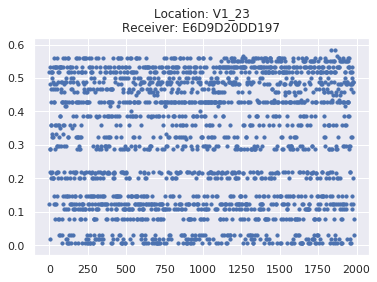

In [13]:
plot_rssi(train, 'V1_23', 'E6D9D20DD197')

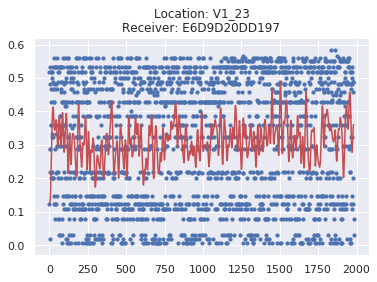

In [14]:
plot_rssi(train, 'V1_23', 'E6D9D20DD197', lpass=True)

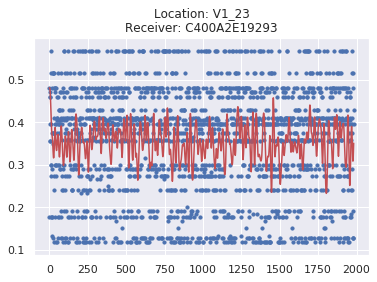

In [15]:
plot_rssi(train, 'V1_23', 'C400A2E19293', lpass=True)

In [16]:
def fn(sub_df):
    for s in scanners:
        sub_df[s] = lfilter(sub_df[s])
    return sub_df

lfiltered_train = train.groupby('location').apply(fn)

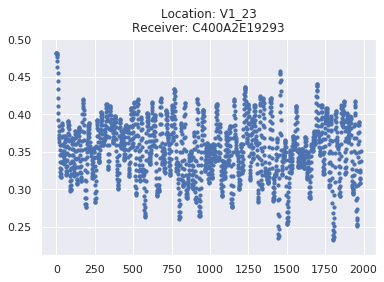

In [17]:
plot_rssi(lfiltered_train, 'V1_23', 'C400A2E19293')

In [18]:
lfiltered_validation = validation.groupby('location').apply(fn)
lfiltered_test = test.groupby('location').apply(fn)

In [19]:
X_train, y_train = lfiltered_train[scanners].values, lfiltered_train[["X", "Y"]].values
X_validation, y_validation = lfiltered_validation[scanners].values, lfiltered_validation[["X", "Y"]].values
X_test, y_test = lfiltered_test[scanners].values, lfiltered_test[["X", "Y"]].values

In [20]:
model = MLPRegressor(model_type='special')

In [21]:
history = model.fit(X_train, y_train, X_test, y_test)

Train on 39730 samples, validate on 8458 samples
Epoch 1/4000
39730/39730 [==============================] - 2s 52us/sample - loss: 95.5109 - mae: 7.1772 - mse: 95.4272 - val_loss: 31.2918 - val_mae: 4.3879 - val_mse: 31.2377
Epoch 2/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 33.7679 - mae: 4.5539 - mse: 33.7218 - val_loss: 25.7291 - val_mae: 3.9978 - val_mse: 25.6850
Epoch 3/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 33.1683 - mae: 4.5167 - mse: 33.1235 - val_loss: 21.2928 - val_mae: 3.6723 - val_mse: 21.2474
Epoch 4/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 32.6471 - mae: 4.4806 - mse: 32.6004 - val_loss: 16.8640 - val_mae: 3.2975 - val_mse: 16.8161
Epoch 5/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 32.1400 - mae: 4.4430 - mse: 32.0904 - val_loss: 12.8095 - val_mae: 2.9084 - val_mse: 12.7581
Epoch 6/4000
39730/39730 [==============================] - 1s 32u

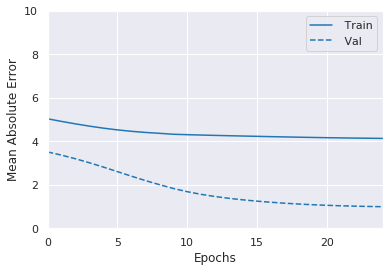

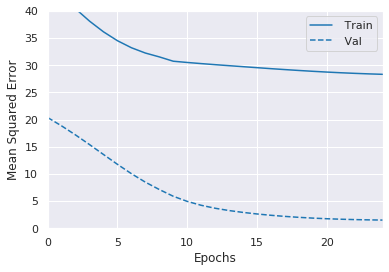

In [22]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 36.0987 - mae: 4.0897 - mse: 28.4371
Validation loss: 28.600518544899018
Mean absolute error: 4.0896573
Mean squared error: 28.437128
Average distance error: 6.742321675709849


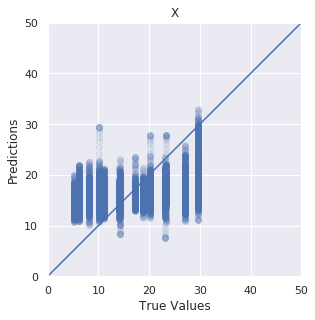

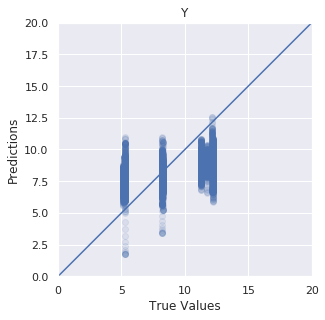

In [23]:
model.model_validation(X_validation, y_validation)

## Model Testing

8458/1 - 0s - loss: 2.4406 - mae: 0.9585 - mse: 1.4792
Test loss: 1.642611457710149
Mean absolute error: 0.9584574
Mean squared error: 1.4792252
Average distance error: 1.5170497109230394


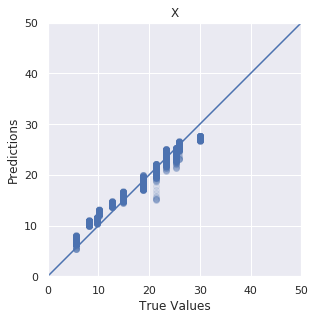

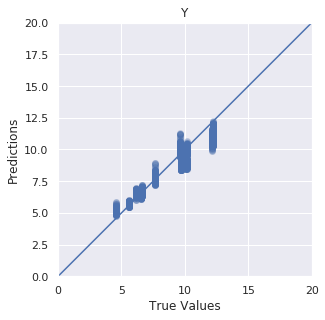

In [24]:
model.model_testing(X_test, y_test)

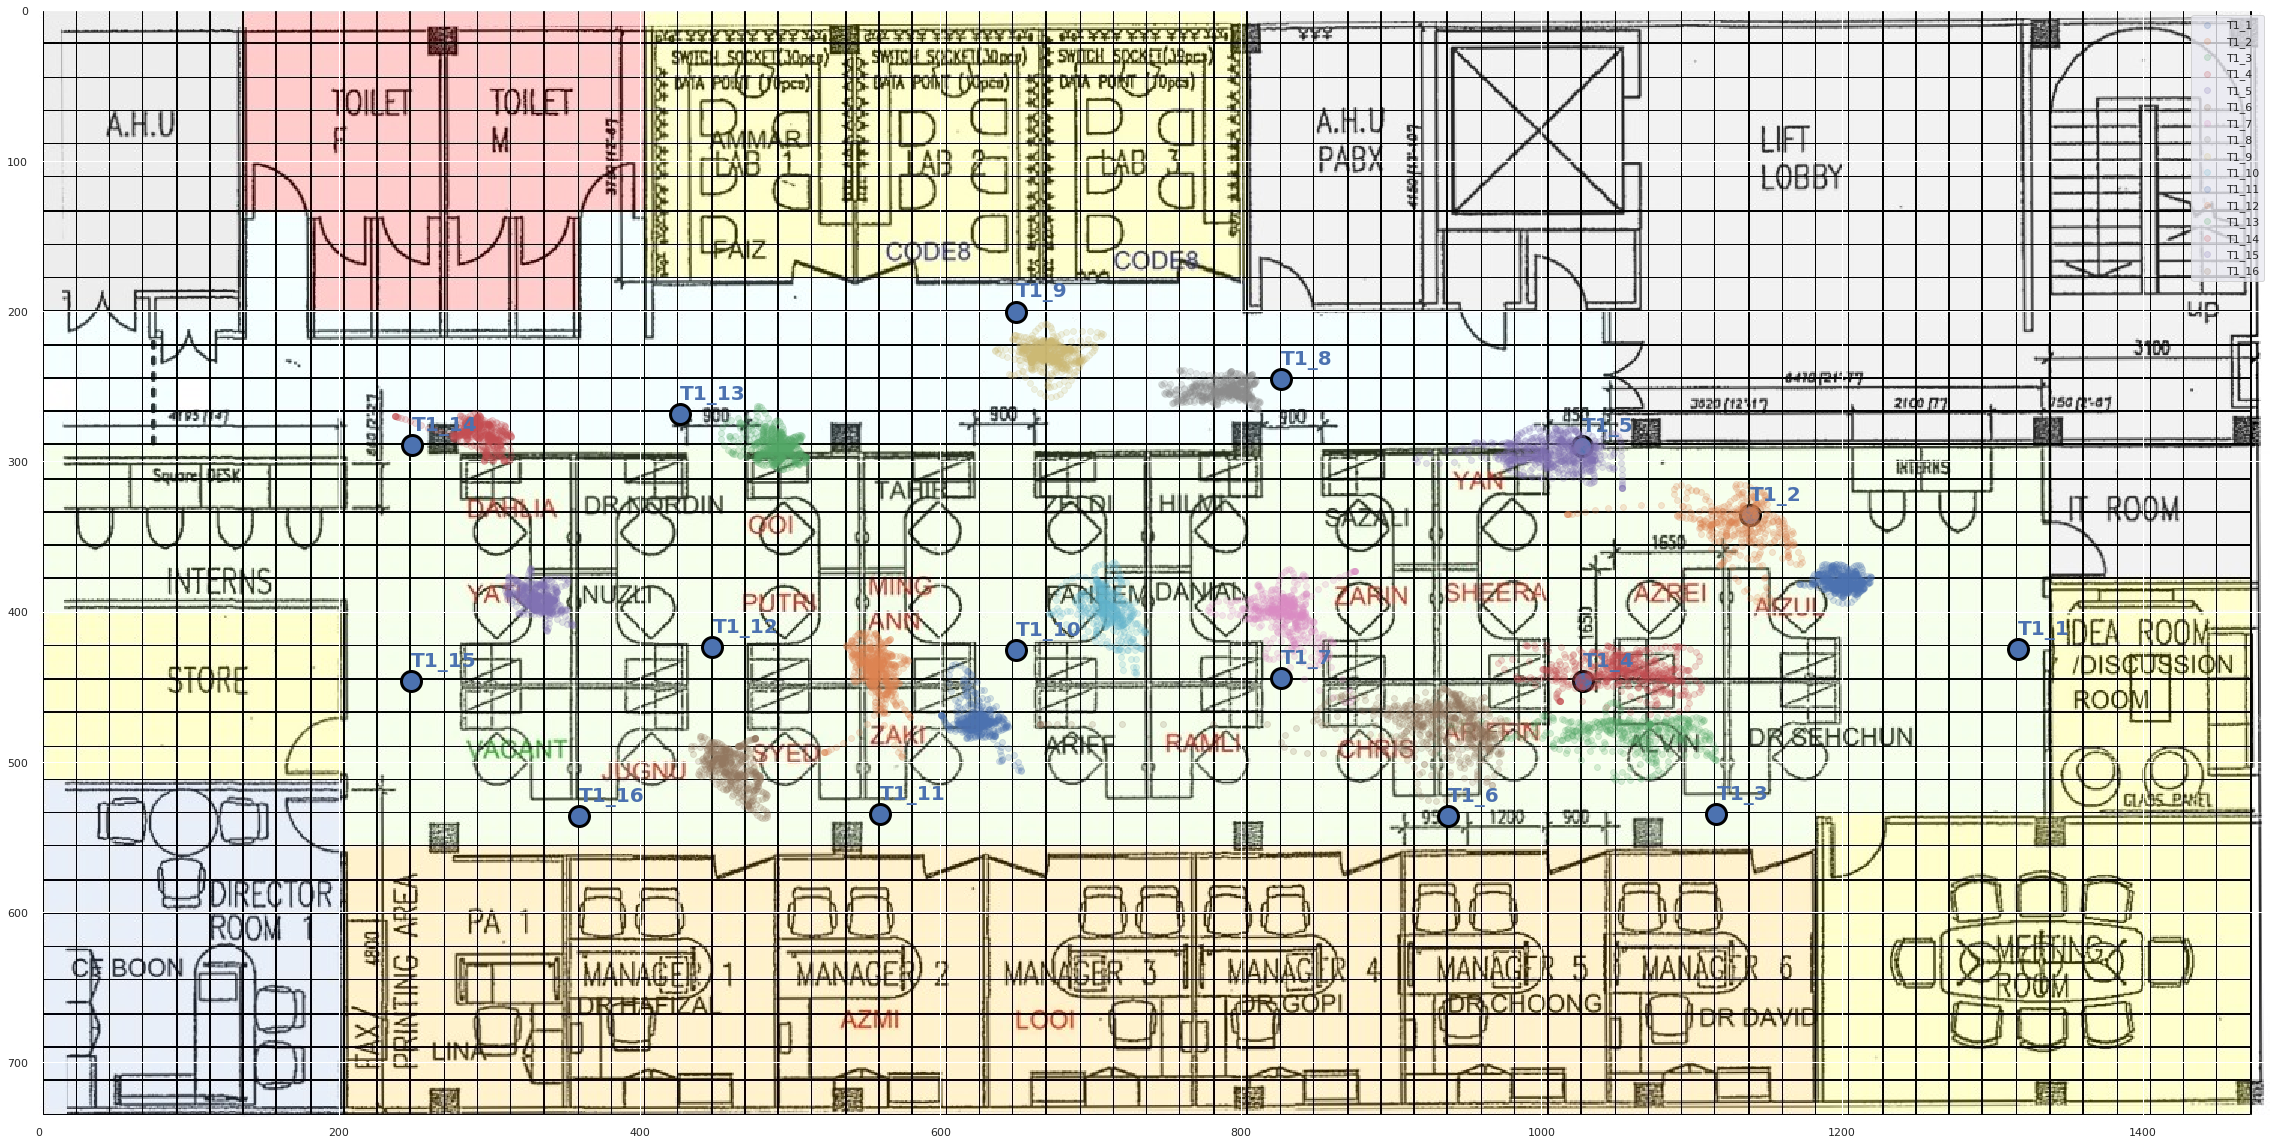

In [25]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = lfiltered_test[lfiltered_test['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()

In [26]:
model.model.save_weights('../Models/MLP_Regression_Rolling_FFill_MinMax_ExtraTest_LinearDistanceModel_FourierTransform.h5')